In [28]:
import requests
import html5lib
from bs4 import BeautifulSoup
from googlesearch import search
import urllib

In [2]:
query = 'Bacán+Campanet'
for i in search(query, tld='es', lang='es', stop=10, pause=2.0):
  print(i)

https://bacanpizzasdeautor.com/
https://bacanpizzasdeautor.com/carta/
https://bacanpizzasdeautor.com/nuestra-historia/
https://bacanpizzasdeautor.com/obrador/
https://www.tripadvisor.es/Restaurant_Review-g1068165-d17854042-Reviews-Bacan_Pizzas_de_Autor-Campanet_Majorca_Balearic_Islands.html
https://www.facebook.com/bacanpizzas
https://es.restaurantguru.com/Bacan-Pizzas-de-Autor-Campanet
https://www.instagram.com/bacanpizzas/?hl=es
https://bacan-pizza-de-autor.negocio.site/
https://jobtoday.com/es/company/pizzeria-de-autor-bacan-pizzas-de-autor-WM1zZ8


In [101]:
def get_data(query):
  '''
  Function to return basic information of a restaurant given a query in Google.

  Input:
  - Query (string)

  Output:
  - Dictionary that contains the name, address, location, telephone, rating.  
  '''

  # Read the url and prepare it for scraping:
  q = urllib.parse.quote_plus(query)
  query_url = 'https://www.google.cat/search?hl=ca&q=' + q
  r = requests.get(query_url)
  soup = BeautifulSoup(r.text, 'html5lib')
  r.close()
  table = soup.find("div", attrs = {"id": "main"})

  # Create an empty dictionary:
  dictionary = {}

  # Get name: (to be improved; now it only works for single-name restaurants):
  dictionary['Name'] = query.split(' ')[0]

  # Get address and telephone number:
  data1 = table.find_all("span", class_="BNeawe tAd8D AP7Wnd")
  dictionary['Address'] = data1[0].text
  dictionary['Tlf'] = data1[2].text

  # Get location:
  data2 = table.find_all("a", class_="eZt8xd")
  for entry in data2:
    if entry.text == 'Maps':
      dictionary['Location'] = entry['href']

  # Get rating:
  data3 = table.find_all("div", class_="Hk2yDb KsR1A")
  dictionary['Rating'] = data3[0]['aria-label']
  # Alternative: just the number
  # It always follows this formula: "Valorat en x.x de x possibles"
  # dictionary['Rating'] =  data3[0]['aria-label'].split(' ')[2]

  # Get restaurant type:
  data4 = table.find_all("div", class_="BNeawe tAd8D AP7Wnd")
  dictionary['Restaurant type'] = data4[0].text.split('\n')[-1]

  # Get website:
  data5 = table.find_all("div", class_="BNeawe UPmit AP7Wnd")
  # Search heuristic: give the first result (most likely to be the original website), 
  # as long as it is not a subpage from a larger platform (facebook, instagram, tripadvisor)
  # If the first element is a subpage, just give the first link which is not.
  for entry in data5:
    if '›' not in entry.text and len(entry.text.split('.')) < 2:  
      dictionary['Website'] = entry.text

  '''
  Todo:
  - dictionary['Hours'] (information not provided)
  - dictionary['Image'] (information not provided)
  - dictionary['Name'] (now it only works for single-word names)
  - if the google search is not successful (this is, it returns a "card" with basic info on the right of the result page), it raises an error (there is no "card" to scrap)
  '''

  return dictionary

In [102]:
get_data('Miceli Selva')

{'Address': 'Carrer dels Angels, 11, 07313 Selva, Illes Balears, Espanya',
 'Location': 'https://maps.google.cat/maps?hl=ca&q=Miceli+Selva&um=1&ie=UTF-8&sa=X&ved=0ahUKEwitxL2f2_vwAhUEyosBHXgKAbIQ_AUICSgC',
 'Name': 'Miceli',
 'Rating': 'Valorat en 4.8 de 5 possibles',
 'Restaurant type': 'Restaurant',
 'Tlf': '+34 971 87 37 84'}

In [82]:
get_data('Bacán Campanet')

{'Address': 'Plaça son Bordoy, 6, 07310 Campanet, Illes Balears, Espanya',
 'Location': 'https://maps.google.cat/maps?hl=ca&q=Bac%C3%A1n+Campanet&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjJya7c1vvwAhVQGaYKHQtcDx4Q_AUICCgB',
 'Name': 'Bacán',
 'Rating': 'Valorat en 4.8 de 5 possibles',
 'Restaurant type': 'Pizzeria',
 'Tlf': '+34 640 80 96 08',
 'Website': 'bacanpizzasdeautor.com'}

In [92]:
get_data('Skalop Inca')

{'Address': 'Avinguda del General Luque, 434, 07300 Inca, Illes Balears, Espanya',
 'Location': 'https://maps.google.cat/maps?hl=ca&q=Skalop+Inca&um=1&ie=UTF-8&sa=X&ved=0ahUKEwix2N3N2fvwAhVzLqYKHXNNCa0Q_AUICCgB',
 'Name': 'Skalop',
 'Rating': 'Valorat en 3.7 de 5 possibles',
 'Restaurant type': 'Restaurant',
 'Tlf': '+34 971 88 19 19',
 'Website': 'www.skalop.com'}

In [96]:
get_data('Wasabi Blue Palma')

{'Address': 'Carrer de Trafalgar, 41, 07007 Palma, Illes Balears, Espanya',
 'Location': 'https://maps.google.cat/maps?hl=ca&q=Wasabi+Blue+Palma&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjdnPyw2vvwAhUuyosBHdyJB_wQ_AUICCgB',
 'Name': 'Wasabi',
 'Rating': 'Valorat en 4.6 de 5 possibles',
 'Restaurant type': 'Restaurant de cuina japonesa',
 'Tlf': '+34 971 26 46 02',
 'Website': 'wasabi-blue.myrestoo.net'}

<div id="main">
 <div>
  <div class="KP7LCb">
   <div class="bRsWnc">
    <div class="N6RWV">
     <div class="Pg70bf Uv67qb">
      <span class="OXXup">
       Tot
      </span>
      <a class="eZt8xd" href="https://maps.google.es/maps?hl=ca&amp;q=Wasabi+Blue+Palma&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwjEv5T02_vwAhVzyYsBHYrWDBkQ_AUICCgB">
       Maps
      </a>
      <a class="eZt8xd" href="/search?q=Wasabi+Blue+Palma&amp;hl=ca&amp;ie=UTF-8&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwjEv5T02_vwAhVzyYsBHYrWDBkQ_AUICSgC">
       Imatges
      </a>
      <a class="eZt8xd" href="/search?q=Wasabi+Blue+Palma&amp;hl=ca&amp;ie=UTF-8&amp;source=lnms&amp;tbm=shop&amp;sa=X&amp;ved=0ahUKEwjEv5T02_vwAhVzyYsBHYrWDBkQ_AUICigD">
       Shopping
      </a>
      <a href="/search?q=Wasabi+Blue+Palma&amp;hl=ca&amp;ie=UTF-8&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwjEv5T02_vwAhVzyYsBHYrWDBkQ_AUICygE">
       Vídeos
      </a>
      <a href="/search?q=Wasabi+Blue+Palma&amp;hl=ca
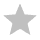
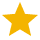

In [103]:
query = 'Wasabi Blue Palma'
query_url = 'https://www.google.es/search?hl=ca&q=' + query
r = requests.get(query_url)
soup = BeautifulSoup(r.text, 'html5lib')
table = soup.find("div", attrs = {"id": "main"})
# table.find_all("div", class_="BNeawe UPmit AP7Wnd")
print(table.prettify())